# Credit Card Fraud Detection



## Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

## Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

In [2]:
# import all the required libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all the required libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling

## Exploratory Data Analysis

In [3]:
#Read CSV file
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Capstone/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [4]:
# Shape of the dataframe

df.shape

(284807, 31)

#### Inference:
We got 284807 records and 31 columns in our dataset.

In [5]:
# statistical summary of  the numeric variables

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [6]:
# Check the info to see the types of the feature variables and the null values present

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Cleaning

In [7]:
df.isnull().sum()*100


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Inference
- The dataset has no null values, Hence no Null treatment is required.

- None of the columns have inconsistent datatype.Hence, no conversion is required.

#### Visualizing the Distribution of `Class` Variable


In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


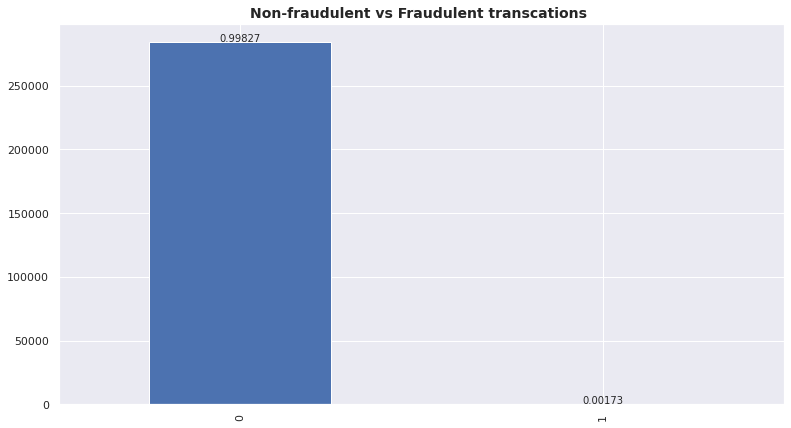

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(13,7))
plt.title('Non-fraudulent vs Fraudulent transcations ', fontweight='bold',fontsize=14)
ax = df['Class'].value_counts().plot(kind='bar')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f}'.format(height/total),ha="center")


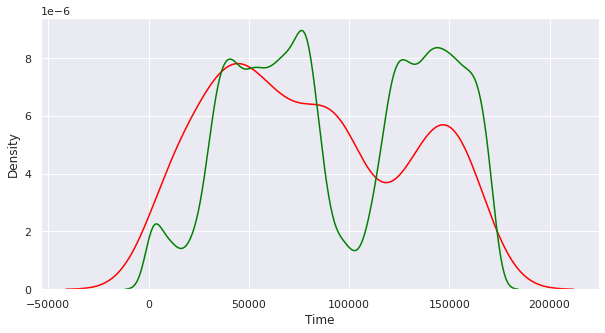

In [10]:
# Create a scatter plot to observe the distribution of classes with time

# Fraudulent and non-fraudulent dataframe
fraudulent = df[df['Class'] == 1]
non_fraudulent = df[df['Class'] == 0]

# Distribution plot
plt.figure(figsize=(10,5))
ax = sns.distplot(fraudulent['Time'],label='Fraudulent',hist=False,color='red')
ax = sns.distplot(non_fraudulent['Time'],label='Non-Fraudulent',hist=False,color='green')
plt.show()

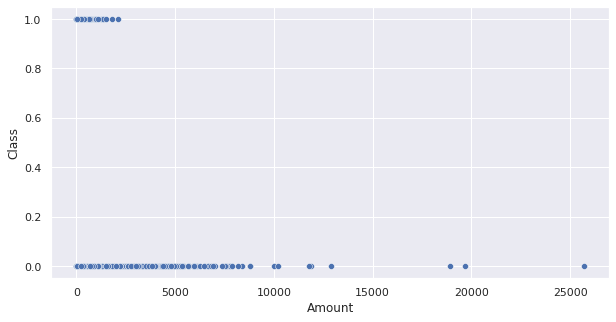

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,5))
sns.scatterplot(y=df.Class, x=df.Amount, data=df)
plt.show()

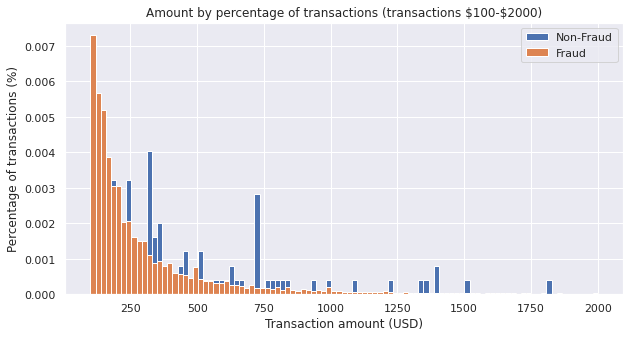

In [12]:
# Plot of high value transactions($100-$2000)
plt.figure(figsize=(10,5))
bins = np.linspace(100, 2000, 100)
plt.hist(fraudulent.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(non_fraudulent.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$100-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

#### Inference

- We can see that data is highly imbalanced

- We have only 492 (0.172%) class 1/ Fradulent records in the complete dataset having a total of 284807 records

- No specific pattern observed for fraud / non-fraud transaction with Time variable, so we would drop Time column  from dataset

- Transaction amount for fradulent transactions lies in low range of values 

- While for fraudulent tranactions there is much scattered distribution 

In [13]:
#Dropping Time column from dataset
df.drop(['Time'], axis=1, inplace=True)

### Splitting the data into train & test data

In [14]:
y= df['Class'] #class variable
X=df.drop("Class", axis = 1)

In [15]:
from sklearn import model_selection

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.21, random_state = 4, stratify = y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
389
103


## Scaling

All variables are PCA transformed except Amount. So we will perform scaling on `Amount variable`

In [17]:
scaler = StandardScaler()
# scaler fit and transform train data
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
90739,-2.0859,-0.5627,1.0045,-0.0391,-0.1437,-0.7303,0.3372,0.6303,-0.2413,-0.8397,0.4569,0.4594,-1.2467,0.5712,-1.3916,0.2691,-0.2093,0.1264,-0.0581,0.5286,0.0842,-0.4372,0.2944,0.3216,0.0723,0.2047,0.1107,-0.0622,0.3751
143067,-7.3918,5.9024,-2.9534,-2.2758,-3.1627,-1.2526,-2.1658,3.3562,2.5409,4.0563,0.1854,1.1503,-0.7429,1.0026,0.0030,1.2748,-0.0706,0.3277,-0.8375,1.6669,-0.4725,-0.5760,0.4269,-0.0847,0.6413,0.6608,-0.1082,-0.7164,-0.3397
115738,1.3705,-1.2415,0.6716,-1.4088,-1.7721,-0.5914,-1.1742,0.0053,-1.8831,1.5852,1.1326,-0.5802,-0.3484,-0.0141,0.1483,0.0524,0.2208,0.5202,0.0419,-0.2705,-0.2988,-0.6887,0.1363,0.2641,0.0578,-0.4299,0.0253,0.0260,-0.1167
234482,2.1081,-0.2077,-3.3861,-0.7208,2.9053,2.9322,0.0548,0.5621,0.0177,0.1905,-0.0791,0.2326,-0.3664,0.7970,0.0860,-0.7218,-0.1693,-0.8954,0.0021,-0.1743,0.0952,0.3675,0.0105,0.7842,0.4129,0.7345,-0.0940,-0.0919,-0.3483
134661,1.0424,0.0811,-0.0659,0.8349,0.8505,1.6600,-0.1349,0.5251,-0.1409,-0.0822,1.7408,1.3038,-0.2078,0.5447,0.4387,-1.3939,0.7348,-1.7760,-1.2125,-0.2840,0.1143,0.6202,-0.0731,-1.3141,0.5469,-0.1454,0.0784,-0.0149,-0.3473


In [18]:
#Scaler transform on test data
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
117591,0.3489,0.8318,0.9384,0.3256,-0.2185,-0.8021,0.0958,-1.0047,-0.3241,-0.5553,0.0341,0.5749,0.8700,-0.3930,0.9368,0.4811,-0.0062,-0.3742,-0.3194,-0.1470,0.4561,-1.1671,-0.0252,0.3565,0.8577,0.1709,0.0324,0.1134,-0.3434
4113,1.4341,-0.6297,-0.8961,-1.6301,1.4750,3.2686,-1.1929,0.7148,0.3621,0.2899,1.0093,-3.1740,1.8662,1.4087,0.2577,1.5314,0.4456,-0.8693,0.7720,0.1875,-0.2884,-0.8893,0.0962,0.9192,0.3633,-0.5066,-0.0167,0.0125,-0.2519
117517,1.1960,0.2448,0.6318,0.6430,-0.4132,-0.6997,0.0197,-0.1125,-0.0471,-0.1228,0.3720,0.7944,0.6744,0.2002,1.2119,-0.1055,-0.0509,-1.1516,-0.6031,-0.1093,-0.2038,-0.5337,0.2018,0.4069,0.1161,0.1027,-0.0091,0.0197,-0.3474
220552,2.1621,0.0421,-2.0582,0.1680,0.8570,-0.5426,0.4752,-0.3592,0.3204,0.0866,-1.4617,0.4069,0.6830,0.2208,-0.4209,-0.3549,-0.4051,-0.6491,0.4899,-0.1519,-0.0858,-0.0227,0.0171,0.1100,0.3216,0.5693,-0.0974,-0.0768,-0.3513
278291,-3.9456,1.3742,-1.1264,-2.4137,-2.0744,0.1476,-1.6232,2.4149,1.1155,-1.9603,-0.7427,0.3476,-0.8689,-0.2605,-0.0649,2.5181,0.1494,1.9021,-0.9300,-0.5756,0.1644,-0.0129,-0.5607,-1.2179,0.7266,0.6615,-0.6941,-0.2825,0.0383


### Plotting the distribution of a variable

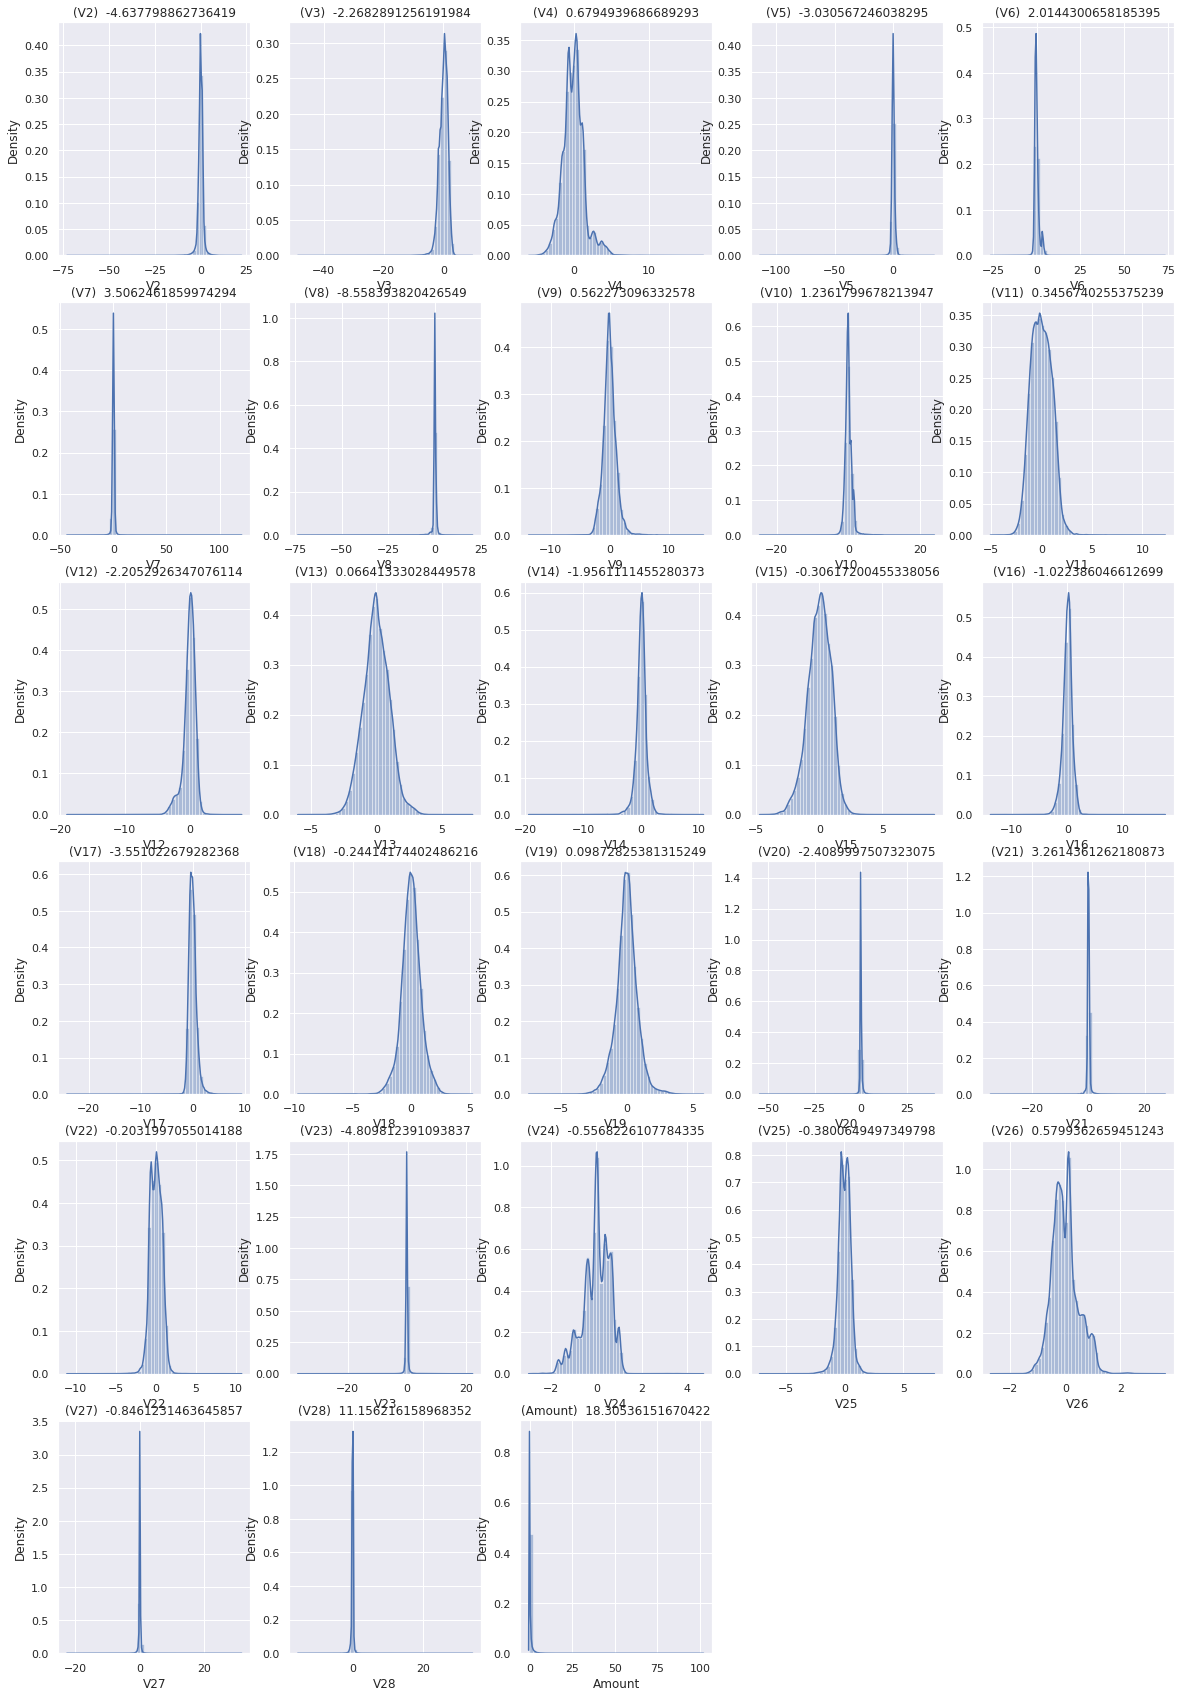

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
cols = X_train.columns
plt.figure(figsize=(20,30))
for col in range(1,len(cols)) :    
    plt.subplot(6, 5,col)    
    val = cols[col]
    sns.distplot(X_train[val])    
    plt.title('('+cols[col]+')  '+str(X_train[val].skew()))
plt.show()

#### Inference

We can see that few features are skewed. We will mitigate skewness to make distribution more gaussian

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform on train data
X_train[cols] = PT.fit_transform(X_train)

# Transform on test set

X_test[cols] = PT.transform(X_test)

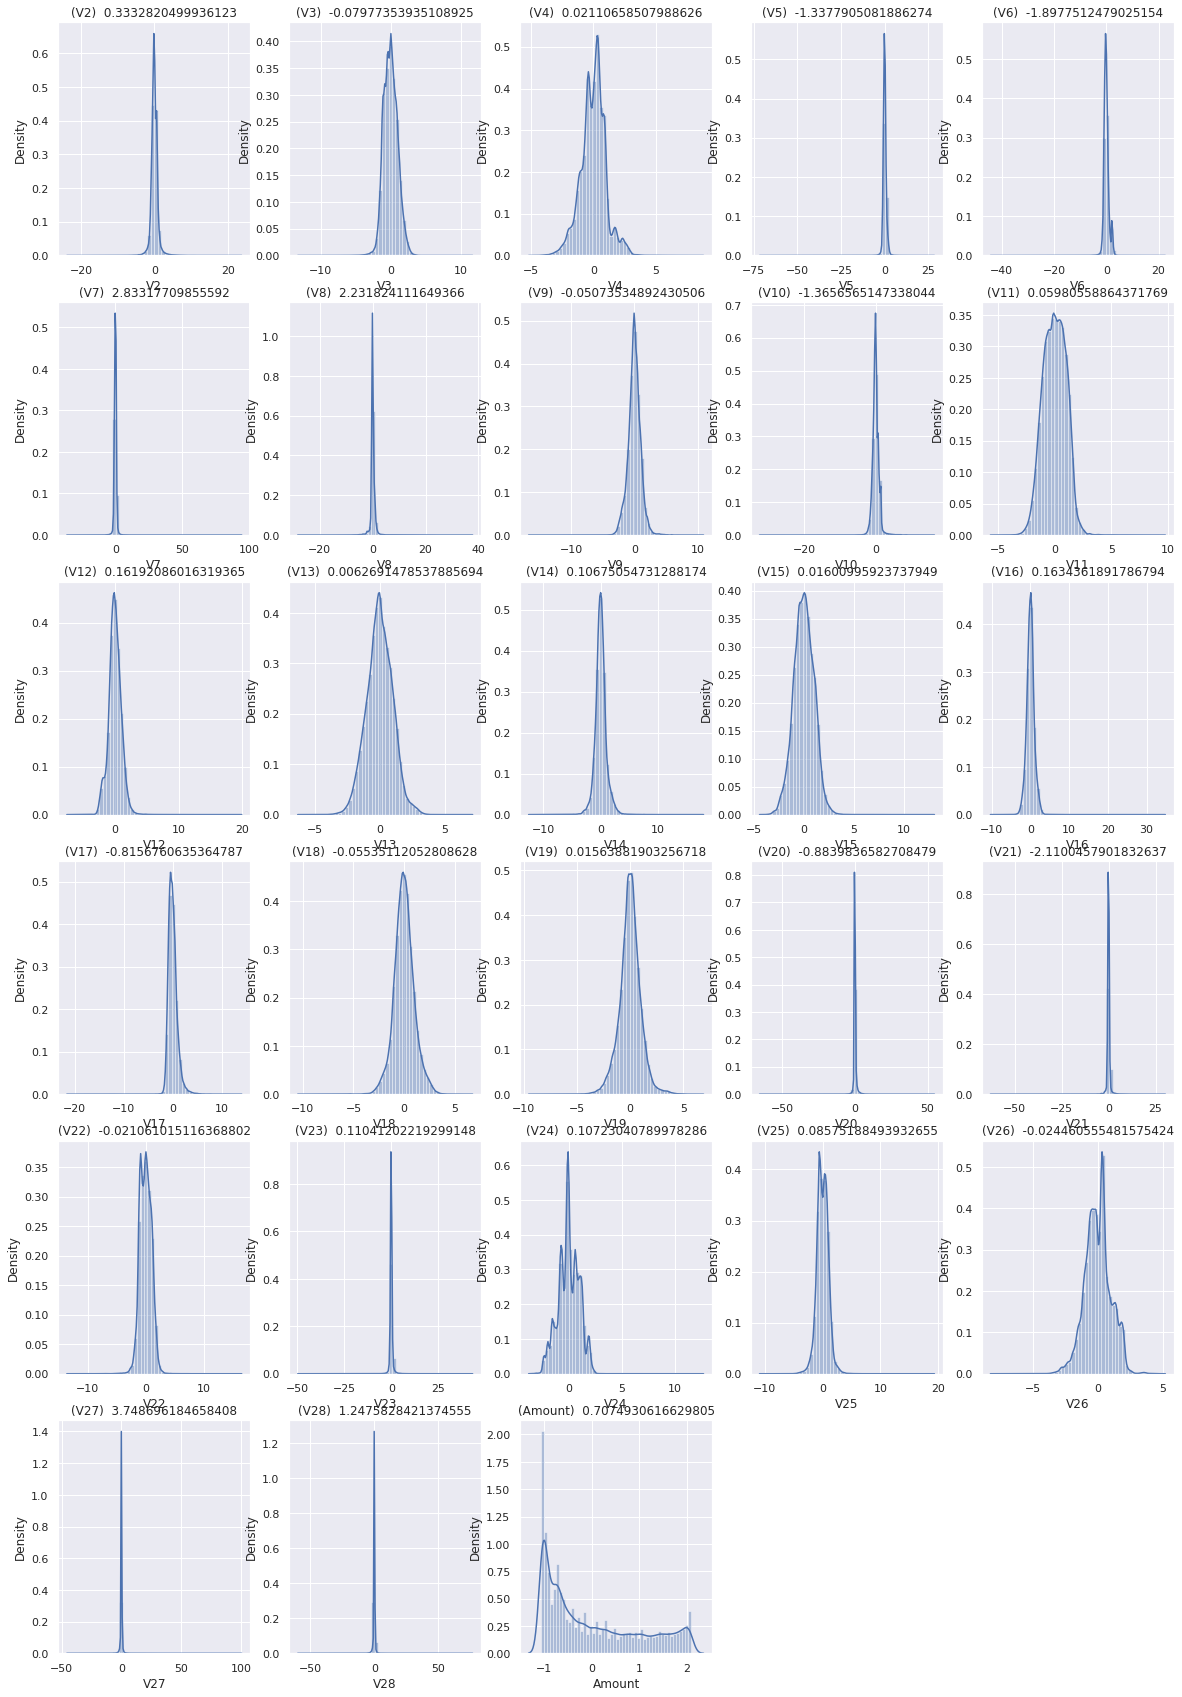

In [21]:
# plot the histogram of a variable from the dataset again to see the result 

plt.figure(figsize=(20,30))
for col in range(1,len(cols)) :    
    plt.subplot(6, 5,col)    
    val = cols[col]
    sns.distplot(X_train[val])    
    plt.title('('+cols[col]+')  '+str(X_train[val].skew()))
plt.show()

#### Inference:
All the variables are normally distributed.

## Model Building on imbalanced Data

- Performance Evaluation Metrics
    - Going with AUC-ROC as evaluation metric as score is computed considering all possible thresholds and this metric is independent of threshold.

    - Other metrices e.g. accuracy, confusion matrix, recision, recall F1 score are threshold dependent
    
- Looking at number of class 1 records we have in train set keeping the number of folds 4 to have atleast around 100 class 1 records in each fold

### Logistic Regression

In [22]:
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm = LogisticRegression(max_iter=500)
lm_cv = GridSearchCV(estimator=lm, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
lm_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print("Best AUC: ", lm_cv.best_score_)

#print the optimum value of hyperparameters
print("Best hyperparameters: ", lm_cv.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best AUC:  0.9793520169001473
Best hyperparameters:  {'C': 0.01}


In [23]:
# evaluation on train data
y_train_pred_prob = lm_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))



#print the optimum value of hyperparameters

print("Best hyperparameters: ", lm_cv.best_params_)

Train AUC:    	 0.9823
Best hyperparameters:  {'C': 0.01}


In [24]:
# evaluation on test data
y_test_pred_prob = lm_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9847


In [25]:
# Storing the result
result = {"Model":["Logistic Regression"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = pd.DataFrame(result)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847


### Decision Tree

In [26]:
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt = DecisionTreeClassifier(random_state=1)
dt_cv = GridSearchCV(estimator=dt, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

#fit the model
dt_cv.fit(X_train, y_train)

#Best AUC
print("Best AUC: ", dt_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv.best_params_)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
Best AUC:  0.9419409868294428
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}


In [27]:
#Tweaking hyperparameter values closer to last best 
params = {"criterion": ['gini'], 'min_samples_leaf': [15, 20, 25, 30, 40], 'max_depth': [6,7,8,10]}

dt = DecisionTreeClassifier(random_state=1)
dt_cv = GridSearchCV(estimator=dt, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv.fit(X_train, y_train)

#Best AUC
print("Best AUC: ", dt_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv.best_params_)


Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best AUC:  0.943746360257633
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20}


In [28]:
# evaluation on train data
y_train_pred_prob = dt_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

Train AUC:    	 0.9547


In [29]:
# evaluation on test data
y_test_pred_prob = dt_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9334


In [30]:
# Storing the result
result = {"Model":["Decision Tree"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334


### Random Forest


In [31]:
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

rf = RandomForestClassifier(n_jobs = -1)
rf_cv = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [32]:
#Best AUC
print("Best AUC: ", rf_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv.best_params_)

Best AUC:  0.9751738865102018
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 80}


In [33]:
# evaluation on train data
y_train_pred_prob = rf_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

Train AUC:    	 0.9899


In [34]:
# evaluation on test data
y_test_pred_prob = rf_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9793


In [35]:
# Storing the result
result = {"Model":["Random Forest"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793


### XGBOOST

In [36]:
#perform cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

#perform hyperparameter tuning
parameters = {'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'subsample': [0.3, 0.5, 0.7],'max_depth':[5,8], 'n_estimators': [50]}
scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True, needs_proba=True, needs_threshold=False) 

xgbm = xgb.XGBClassifier()
xgbm_cv = model_selection.GridSearchCV(estimator=xgbm, param_grid=parameters, n_jobs=-1, cv=folds, scoring=scorer, refit=True)

xgbm_cv.fit(X_train, y_train)

#Best AUC
print("Best AUC: ", xgbm_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", xgbm_cv.best_params_)

Best AUC:  0.9795089038328144
Best hyperparameters:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}


In [37]:
# evaluation on train data
y_train_pred_prob = xgbm_cv.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

Train AUC:    	 1.0


In [38]:
# evaluation on test data
y_test_pred_prob = xgbm_cv.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9736


In [39]:
# Storing the result
result = {"Model":["XGBOOST"],"Train ROC-AUC Score":[round(roc_auc_score(y_train, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736


#### Inference

- It is seen after trying different models on imbalanced data XG boost performed best.
- XGBOOST is very resource intensive and takes a lot of time for training.
- Random Forest also performed well. This also consume lot of resources and took good time for training
- Logistic regression took less time and resources and gave good performance result


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [40]:
#initialise the model with optimum hyperparameters
clf = xgb.XGBClassifier(learning_rate=0.3, subsample=0.7, max_depth=5, n_estimators=50)
clf.fit(X_train, y_train)


XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.7)

In [41]:
# evaluation on train data
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

Train AUC:    	 1.0


In [42]:
# evaluation score on test data
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),2))

Test AUC:    	 0.97


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


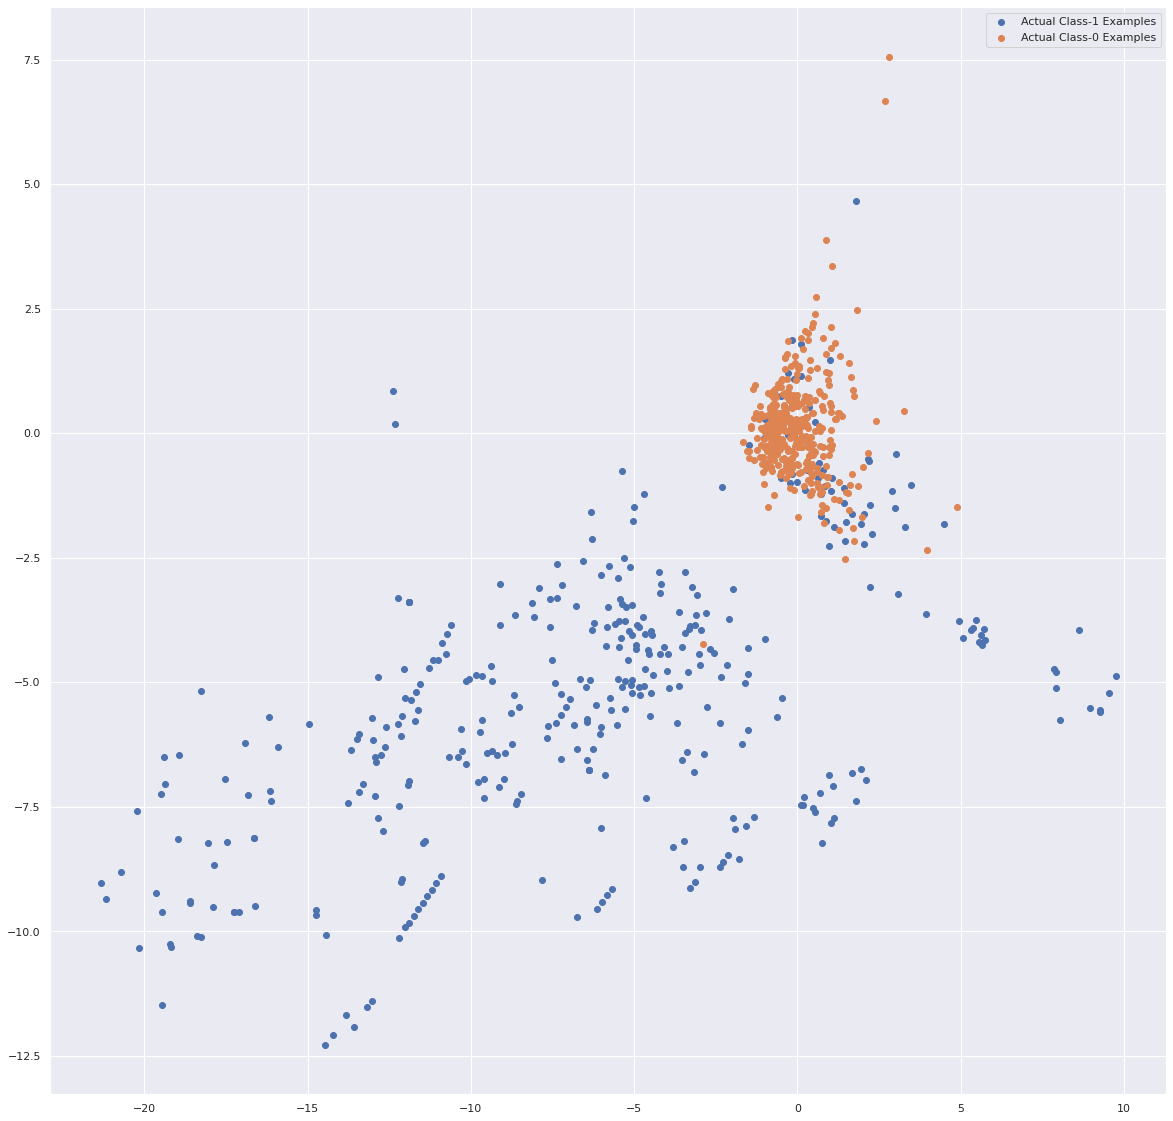

In [43]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

Feature: 0, Score: 0.02073
Feature: 1, Score: 0.02362
Feature: 2, Score: 0.02383
Feature: 3, Score: 0.03597
Feature: 4, Score: 0.01544
Feature: 5, Score: 0.02580
Feature: 6, Score: 0.02943
Feature: 7, Score: 0.02764
Feature: 8, Score: 0.01700
Feature: 9, Score: 0.04480
Feature: 10, Score: 0.01927
Feature: 11, Score: 0.02731
Feature: 12, Score: 0.02148
Feature: 13, Score: 0.06153
Feature: 14, Score: 0.01495
Feature: 15, Score: 0.01884
Feature: 16, Score: 0.32571
Feature: 17, Score: 0.01790
Feature: 18, Score: 0.01547
Feature: 19, Score: 0.02173
Feature: 20, Score: 0.01548
Feature: 21, Score: 0.01597
Feature: 22, Score: 0.01863
Feature: 23, Score: 0.02014
Feature: 24, Score: 0.01779
Feature: 25, Score: 0.02225
Feature: 26, Score: 0.02500
Feature: 27, Score: 0.03395
Feature: 28, Score: 0.02237


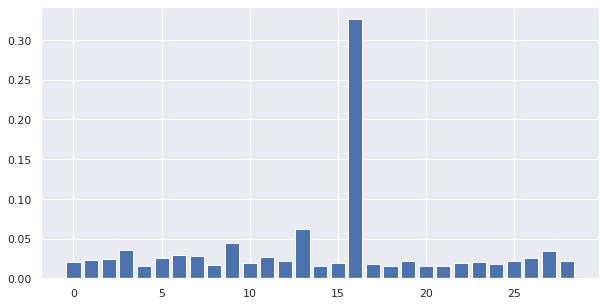

In [44]:
# Listing all the features with their importance and creating a bar plot

importance = clf.feature_importances_


# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Inference
Vriable 17  and Variable 14  are top two features

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

Model building with balancing Classes



##### Tried Different Models on balanaced data
- XGBOOST has not been ran on balanced data for building the model. XGBOOST was taking lot of resources and time as seen while building model on imbalanced data above. 
- With limited resources in hand tried models with:
    - Logistic Regression
    - Decision Tree
    - Random Forest

###  Random Oversampling

In [45]:
#Initialize RandomOverSampler
ROS = RandomOverSampler(random_state=1)

#Run RandomOverSampler on Train data to handle imbalance
X_train_ROS, y_train_ROS = ROS.fit_resample(X_train, y_train)

from collections import Counter

print(sorted(Counter(y_train).items())) #count before Random oversampling
print(sorted(Counter(y_train_ROS).items())) #count after Random oversampling


[(0, 224608), (1, 389)]
[(0, 224608), (1, 224608)]


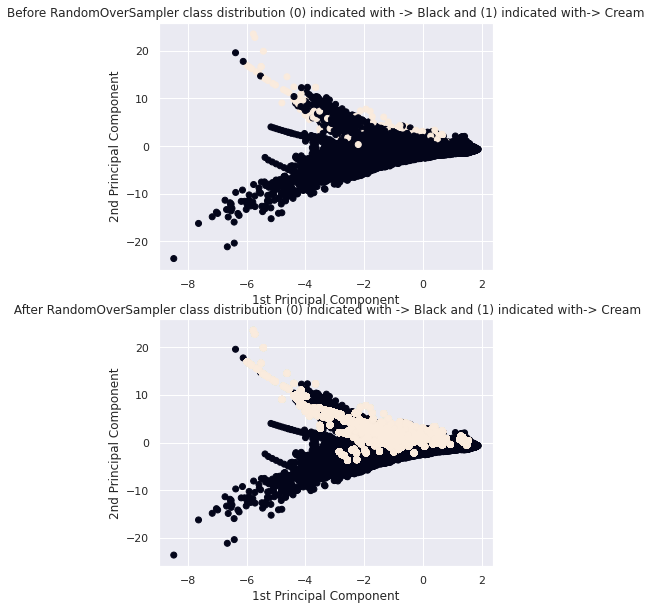

In [46]:
# scatter plot of examples by class labels before and after Random Oversampling

plt.figure(figsize = (6, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before RandomOverSampler class distribution (0) indicated with -> Black and (1) indicated with-> Cream')
plt.subplot(2, 1, 2)
plt.scatter(X_train_ROS['V1'], X_train_ROS['V2'], c = y_train_ROS)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('\n\n After RandomOverSampler class distribution (0) indicated with -> Black and (1) indicated with-> Cream')
plt.show()

## Model Building
- Build different models on the balanced dataset and see the result
- Using 5 folds with balanced data


### Logistic Regression

In [47]:

#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_ROS = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_ROS = GridSearchCV(estimator=lm_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_ROS.fit(X_train_ROS, y_train_ROS)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [48]:
#Best AUC
print("Best AUC: ", lm_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_ROS.best_params_)

Best AUC:  0.9862051628272972
Best hyperparameters:  {'C': 5}


In [49]:
# evaluation on train data
y_train_pred_prob = lm_cv_ROS.predict_proba(X_train_ROS)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ROS, y_train_pred_prob),4))

Train AUC:    	 0.9862


In [50]:
# evaluation on test data
y_test_pred_prob = lm_cv_ROS.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9842


In [51]:
# Storing the result
result = {"Model":["Logistic Regression With RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ROS, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842


### Decision Tree

In [52]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt_ROS = DecisionTreeClassifier(random_state=1)
dt_cv_ROS = GridSearchCV(estimator=dt_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_ROS.fit(X_train_ROS, y_train_ROS)

#Best AUC
print("Best AUC: ", dt_cv_ROS.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_ROS.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best AUC:  0.9984831869294142
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10}


In [53]:
# evaluation on train data
y_train_pred_prob = dt_cv_ROS.predict_proba(X_train_ROS)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ROS, y_train_pred_prob),4))

Train AUC:    	 0.9982


In [54]:
# Storing the result
result = {"Model":[" Decision with RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ROS, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842


### Random Forest

In [55]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50, 80] }

rf_ROS = RandomForestClassifier(n_jobs = -1)
rf_cv_ROS = GridSearchCV(estimator=rf_ROS, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_ROS.fit(X_train_ROS, y_train_ROS)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [56]:
#Best AUC
print("Best AUC: ", rf_cv.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv.best_params_)

Best AUC:  0.9751738865102018
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 80}


In [57]:
# evaluation on train data
y_train_pred_prob = rf_cv_ROS.predict_proba(X_train_ROS)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_ROS, y_train_pred_prob),4))


Train AUC:    	 0.9997


In [58]:
# evaluation on test data
y_test_pred_prob = rf_cv_ROS.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9837


In [59]:
# Storing the result
result = {"Model":["Random Forest with RandomOverSampler"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_ROS, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842
6,Random Forest with RandomOverSampler,0.9997,0.9837


### Print the class distribution after applying SMOTE 

Before SMOTE Counter({0: 224608, 1: 389})
After SMOTE Counter({0: 224608, 1: 224608})


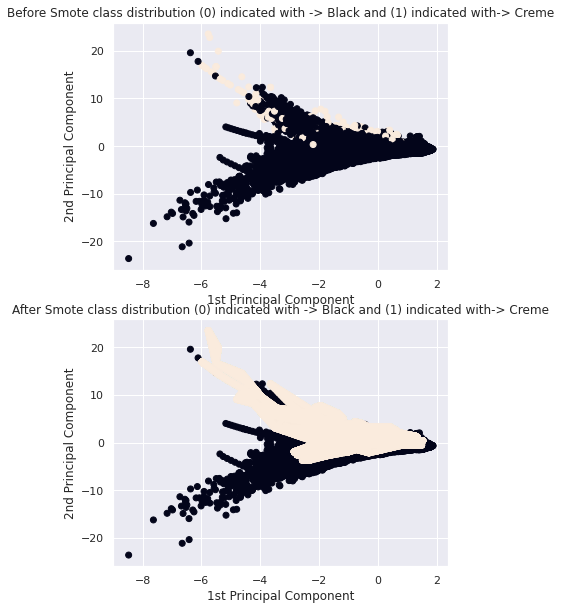

In [60]:
# Initialize SMOTE
sm = over_sampling.SMOTE(random_state=0)

#Run SMOTE on train data to handle imbalance
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# summarize the new class distribution 

counter = Counter(y_train)
print("Before SMOTE", counter)

counter = Counter(y_train_smote)
print("After SMOTE", counter)

# scatter plot of examples by class label before and ater applying SMOTE

plt.figure(figsize = (6, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before Smote class distribution (0) indicated with -> Black and (1) indicated with-> Creme')
plt.subplot(2, 1, 2)
plt.scatter(X_train_smote['V1'], X_train_smote['V2'], c = y_train_smote)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('After Smote class distribution (0) indicated with -> Black and (1) indicated with-> Creme')
plt.show()

### Logistic Regression

In [61]:
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_smote = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_smote = GridSearchCV(estimator=lm_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_smote.fit(X_train_smote, y_train_smote)

#Best AUC
print("Best AUC: ", lm_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_smote.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best AUC:  0.9890252937633498
Best hyperparameters:  {'C': 5}


In [62]:
# evaluation on train data
y_train_pred_prob = lm_cv_smote.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))

Train AUC:    	 0.989


In [63]:
# evaluation on test data
y_test_pred_prob = lm_cv_smote.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9831


In [64]:
# Storing the result
result = {"Model":["Logistic Regression With SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_smote, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df


,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842
6,Random Forest with RandomOverSampler,0.9997,0.9837
7,Logistic Regression With SMOTE,0.9890,0.9831


### Decision Tree


In [65]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

dt_smote = DecisionTreeClassifier(random_state=1)
dt_cv_smote = GridSearchCV(estimator=dt_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [66]:
#Best AUC
print("Best AUC: ", dt_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_smote.best_params_)

Best AUC:  0.996270259690036
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 20}


In [67]:
# evaluation on train data
y_train_pred_prob = dt_cv_smote.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))

Train AUC:    	 0.9969


In [68]:
# evaluation on test data
y_test_pred_prob = dt_cv_smote.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9286


In [69]:
# Storing the result
result = {"Model":["Decision Tree with SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_smote, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842
6,Random Forest with RandomOverSampler,0.9997,0.9837
7,Logistic Regression With SMOTE,0.9890,0.9831
8,Decision Tree with SMOTE,0.9969,0.9286


### Random Forest

In [70]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

rf_smote = RandomForestClassifier(n_jobs = -1)
rf_cv_smote = GridSearchCV(estimator=rf_smote, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [71]:
#Best AUC
print("Best AUC: ", rf_cv_smote.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_smote.best_params_)

Best AUC:  0.998317325402887
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 80}


In [72]:
# evaluation on train data
y_train_pred_prob = rf_cv_smote.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))

Train AUC:    	 0.9982


In [73]:
# evaluation on test data
y_test_pred_prob = rf_cv_smote.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9836


In [74]:
# Storing the result
result = {"Model":["Random Forest with SMOTE"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_smote, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842
6,Random Forest with RandomOverSampler,0.9997,0.9837
7,Logistic Regression With SMOTE,0.9890,0.9831
8,Decision Tree with SMOTE,0.9969,0.9286
9,Random Forest with SMOTE,0.9982,0.9836


###  ADASYN

### Print the class distribution after applying ADASYN

Before ADASYN Counter({0: 224608, 1: 389})
After ADASYN Counter({0: 224608, 1: 224590})


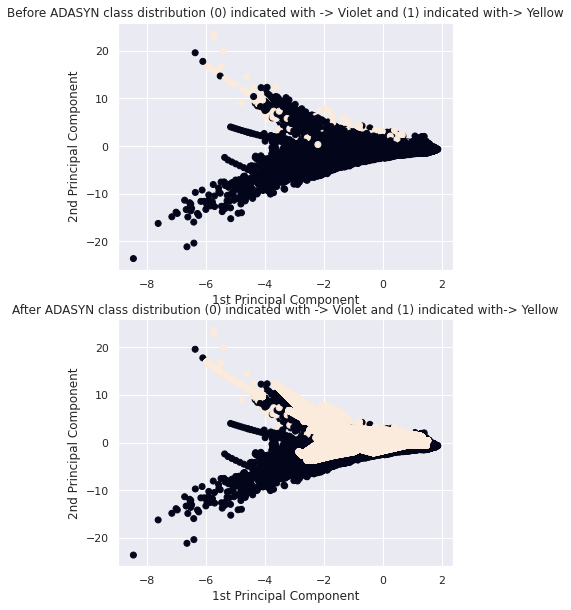

In [75]:
# initialize ADASYN
ada = over_sampling.ADASYN(random_state=0)

#Run ADSYN on train data to handle data imbalance
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# summarize the new class distribution

counter = Counter(y_train)
print("Before ADASYN", counter)

counter = Counter(y_train_adasyn)
print("After ADASYN", counter)

# scatter plot of examples by class label before and after applying ADASYN

plt.figure(figsize = (6, 10))
plt.subplot(2, 1, 1)
plt.scatter(X_train['V1'], X_train['V2'], c = y_train)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before ADASYN class distribution (0) indicated with -> Black and (1) indicated with-> Creme')
plt.subplot(2, 1, 2)
plt.scatter(X_train_adasyn['V1'], X_train_adasyn['V2'], c = y_train_adasyn)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('After ADASYN class distribution (0) indicated with -> Black and (1) indicated with-> Creme')
plt.show()

### Logistic Regression


In [76]:
#perform cross validation 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
#perform hyperparameter tuning
c_space = [0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]
params = {'C': c_space}
lm_ada = LogisticRegression(max_iter=500)# Tried with default value first but did not converge, manually set max_iter to given value to work
lm_cv_ada = GridSearchCV(estimator=lm_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

lm_cv_ada.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5]},
             scoring='roc_auc', verbose=1)

In [77]:
#Best AUC
print("Best AUC: ", lm_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", lm_cv_ada.best_params_)

Best AUC:  0.9594045225331385
Best hyperparameters:  {'C': 5}


In [78]:
# evaluation on train data
y_train_pred_prob = lm_cv_ada.predict_proba(X_train_adasyn)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4))

Train AUC:    	 0.9594


In [79]:
# evaluation on test data
y_test_pred_prob = lm_cv_ada.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9843


In [80]:
# Storing the result
result = {"Model":["Logistic Regression With ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df


,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842
6,Random Forest with RandomOverSampler,0.9997,0.9837
7,Logistic Regression With SMOTE,0.9890,0.9831
8,Decision Tree with SMOTE,0.9969,0.9286
9,Random Forest with SMOTE,0.9982,0.9836


### Decision Tree

In [81]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3,5,8]}

dt_ada = DecisionTreeClassifier(random_state=1)
dt_cv_ada = GridSearchCV(estimator=dt_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
dt_cv_ada.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [82]:
#Best AUC
print("Best AUC: ", dt_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", dt_cv_ada.best_params_)

Best AUC:  0.9856044853121396
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}


In [83]:
# evaluation on train data
y_train_pred_prob = dt_cv_ada.predict_proba(X_train_adasyn)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4))


Train AUC:    	 0.985


In [84]:
# evaluation on test data
y_test_pred_prob = dt_cv_ada.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9499


In [85]:
# Storing the result
result = {"Model":["Decision Tree with ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842
6,Random Forest with RandomOverSampler,0.9997,0.9837
7,Logistic Regression With SMOTE,0.9890,0.9831
8,Decision Tree with SMOTE,0.9969,0.9286
9,Random Forest with SMOTE,0.9982,0.9836


### Random Forest

In [86]:
#perform cross validation
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

#perform hyperparameter tuning
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3,5,8], 'n_estimators' : [50,80]}

rf_ada = RandomForestClassifier(n_jobs = -1)
rf_cv_ada = GridSearchCV(estimator=rf_ada, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_cv_ada.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 8],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [50, 80]},
             scoring='roc_auc', verbose=1)

In [87]:
#Best AUC
print("Best AUC: ", rf_cv_ada.best_score_)

#Best hyperparameters
print("Best hyperparameters: ", rf_cv_ada.best_params_)

Best AUC:  0.9974926514805649
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 80}


In [88]:
# evaluation on train data
y_train_pred_prob = rf_cv_ada.predict_proba(X_train_adasyn)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4))

Train AUC:    	 0.997


In [89]:
# evaluation on test data
y_test_pred_prob = rf_cv_ada.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

Test AUC:    	 0.9819


In [90]:
# Storing the result
result = {"Model":["Random Forest with ADASYN"],"Train ROC-AUC Score":[round(roc_auc_score(y_train_adasyn, y_train_pred_prob),4)], "Test ROC-AUC Score":[round(roc_auc_score(y_test, y_test_pred_prob),4)]}
result_df = result_df.append(pd.DataFrame(result), ignore_index=True)
result_df

,Model,Train ROC-AUC Score,Test ROC-AUC Score
0,Logistic Regression,0.9823,0.9847
1,Decision Tree,0.9547,0.9334
2,Random Forest,0.9899,0.9793
3,XGBOOST,1.0000,0.9736
4,Logistic Regression With RandomOverSampler,0.9862,0.9842
5,Decision with RandomOverSampler,0.9982,0.9842
6,Random Forest with RandomOverSampler,0.9997,0.9837
7,Logistic Regression With SMOTE,0.9890,0.9831
8,Decision Tree with SMOTE,0.9969,0.9286
9,Random Forest with SMOTE,0.9982,0.9836


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model

- Predict on the test dataset

- We saw that after trying different models on balanced data Random Forest with SMOTE performed best. Gave good results on train as well as generalized well on test data.

- Random Forest consumes resources and took lot of time to train

- Logistic regression consumed less resources and took less time to train and gave good performance result 

- Purely looking at performance choosing RandomForest with SMOTE which gave very Good results.

- Initializing Random Forest with best hyperparameters and showing the results again

In [91]:
# perform the best oversampling method on X_train & y_train

clf = RandomForestClassifier(n_jobs = -1, criterion='gini', max_depth=8, min_samples_leaf=5, n_estimators=80)  #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote) # fit on the balanced dataset

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=80,
                       n_jobs=-1)

In [92]:
# evaluation on train data
y_train_pred_prob = clf.predict_proba(X_train_smote)[:, 1]
print("Train AUC:    \t", round(roc_auc_score(y_train_smote, y_train_pred_prob),4))

Train AUC:    	 0.9983


In [93]:
# print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]
print("Test AUC:    \t", round(roc_auc_score(y_test, y_test_pred_prob),2))

Test AUC:    	 0.99


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 12


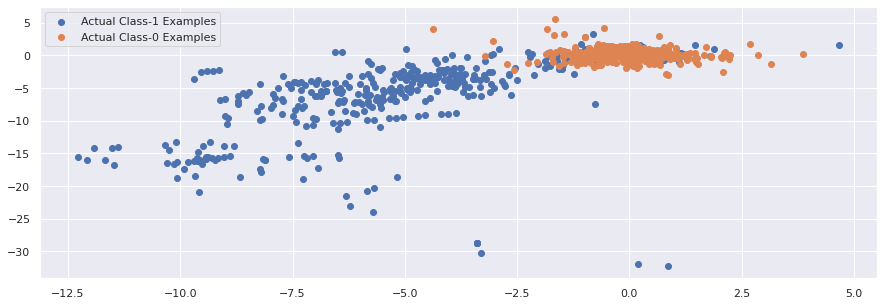

In [94]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Taking top 2 variables and creating a scatter plot against classes
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

Feature: 0, Score: 0.00799
Feature: 1, Score: 0.02203
Feature: 2, Score: 0.06589
Feature: 3, Score: 0.10301
Feature: 4, Score: 0.00580
Feature: 5, Score: 0.01153
Feature: 6, Score: 0.02958
Feature: 7, Score: 0.00961
Feature: 8, Score: 0.01075
Feature: 9, Score: 0.15874
Feature: 10, Score: 0.09300
Feature: 11, Score: 0.10857
Feature: 12, Score: 0.00363
Feature: 13, Score: 0.21424
Feature: 14, Score: 0.00368
Feature: 15, Score: 0.02031
Feature: 16, Score: 0.06731
Feature: 17, Score: 0.01113
Feature: 18, Score: 0.00686
Feature: 19, Score: 0.00377
Feature: 20, Score: 0.00546
Feature: 21, Score: 0.00260
Feature: 22, Score: 0.00456
Feature: 23, Score: 0.00213
Feature: 24, Score: 0.00176
Feature: 25, Score: 0.00379
Feature: 26, Score: 0.00950
Feature: 27, Score: 0.00506
Feature: 28, Score: 0.00771


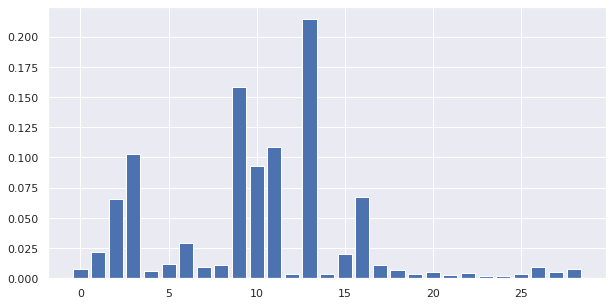

In [95]:
# Listing all the features with their importance and creating a bar plot

importance = clf.feature_importances_


# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Inference

Vriable `V10` and Variable `V14` are top two features

In [96]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9982693164516707
0.3594582424441015


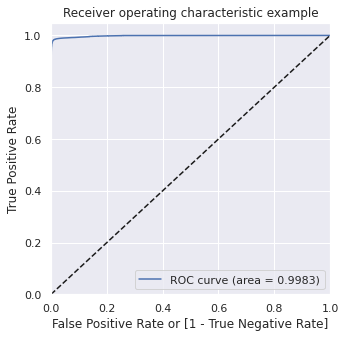

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_prob, drop_intermediate = False )
auc_score = metrics.roc_auc_score(y_train_smote, y_train_pred_prob,)

plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [98]:
# Impoting metrics module
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report



y_train_pred = pd.Series(y_train_pred_prob).map(lambda x: 1 if x > 0.367146 else 0)
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print("Confusion Metrics \n", confusion, '\n')


# classification_report
print("Classification Report\n", classification_report(y_train_smote, y_train_pred))



Confusion Metrics 
 [[222770   1838]
 [  4128 220480]] 

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    224608
           1       0.99      0.98      0.99    224608

    accuracy                           0.99    449216
   macro avg       0.99      0.99      0.99    449216
weighted avg       0.99      0.99      0.99    449216



## Summary

### Understanding the data


- We can see that there are total 31 variables present in dataset including the target variable

- 28 variables are named from `V1` to `V28` which are PCA transofrmed variables

- Apart from that we have `Time`, `Amount` and `Target` variable Class


#### Exploratory Data Analysis

- There are no missing values in dataset

- We have all numerical data

- We have to perform scaling on `Amount` variable

- We can see that data is highly imbalanced

- We have only 492 (0.172%) class 1/ Fradulent records in the complete dataset having a total of 284807 records

- No specific pattern observed for fraud / non-fraud transaction with `Time` variable, so we would drop `Time` column from dataset

- Transaction amount for fradulent transactions lies in low range of values 

- While for non-fraudulent tranactions there is much scattered distribution 

#### Data Preparation
- All variables are PCA transformed except `Amount`. So we will perform scaling on `Amount` variable
- We can see that few features are skewed. We will mitigate skewness to make them normally distributed 
- All features are normally distributed and skewness is handled with Power Transformer

#### Model Building on Imbalanced Data
- Performance Evaluation Metrics
    - Going with AUC-ROC as evaluation metric because here score is computed considering all possible thresholds and this metric is independent of threshold.

    - Other metrices e.g. accuracy, confusion matrix, recision, recall F1 score are threshold dependent, if we change the threshold metric will change and we can not use it to measure performnce.

    - Accuracy anyway is not the right metric for the kind of dataset we have which is highly imbalanced
    
- Looking at number of class 1 records we have in train set keeping the number of folds 4 to have atleast around 100 class 1 records in each fold for cross validation

- We saw that after trying different models on imbalanced data XG boost performed best.

- XGBOOST is very resource intensive and took a lot of time for training.

- Random Forest also performed well. This also consume lot of resources and took good time for training

- Logistic regression took less time and resources and gave good performance result

- <B> Chosen XGBOOST as te best model here with Train ROC-AUC Score - 1.0000, Test ROC-AUC Score - 0.9736
- <B> Variables `V17` and `V14`  are top two features in this best model.
    
#### Model Building on Balanced Data

- XGBOOST has not been chosen for building the model. XGBOOST was taking lot of resources and time as seen while building model on imbalanced data above. 
- With limited resources in hand tried models with Logistic Regression, Decision Tree, Random Forest
- Using 5 folds with balanced data for cross validation
- We saw that after trying different models on balanced data Random Forest with SMOTE performed best. Gave good results on train as well as generalized well on test data.
- Random Forest consumes resources and took a lot of time to train

- Logistic regression consumed less resources and took less time to train and gave good performance result 

- Purely looking at performance choosing RandomForest with SMOTE which gave very good results.
- <B> Chosen Random Forest with SMOTE as best model here with Train ROC-AUC Score - 0.9982, Test ROC-AUC Score - 0.9836
- <B> Vriables `V10` and `V14` are top two features in this best model.
- <B> We saw the improvement in performance of Logistic Regression, Decision Tree and Random Forest models on balanced data compared to imbalanced data